Part A - Logistic Regression [20 points]

Implement logistic regression using gradient descent in Python. Once you
have written the code, test your model by fitting it to the dataset given below.
For this stage, do not implement regularization, cross validation, the cost
function or use the sklearn library until later. The purpose of this part of the
coursework is to get your logistic regression code running and to validate
your model’s results with a small dataset with a known solution. Refer to the
lecture slides on Logistic Regression to see the solution you should be
obtaining with your model.

The data to test your model on is as follows:
X = [[0.50],[0.75],[1.00],[1.25],[1.50],[1.75],[1.75],[2.00],[2.25],[2.50],[2.75],
[3.00],[3.25],[3.50],[4.00],[4.25],[4.50],[4.75],[5.00],[5.50]]
Y = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

Submit a pdf of your Jupyter notebook with answers to the following
questions. Your pdf should include markdown boxes with text answering the
questions and specifying which part you are answering as well as your code
and figures.

1. Implementing the BATCH gradient descent algorithm. What are the optimal
values for theta0 and theta1 learned by your implementation for logistic
regression on the data given?
2. After how many iterations and for what value of alpha did your algorithm
converge? 

In [43]:
import numpy as np

X = [[0.50],[0.75]]
Y = [0, 0]

# turn both arrays into numpy arrays
X = np.array(X)
Y = np.array(Y)

# add a column of ones to the dataset
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)

# hypothesis function:
# take in a theta and dataset X as parameter
# multiply the dataset by the theta
# return the sigmoid (logistic) function as hypothesis
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return 1 / (1 + np.exp(-z))

# print params function:
# take in the num. of iteratations, the value of alpha and thetasw
# return whether the algorithm converged and their values if it did
def printParams(numIterations, alpha, theta):
    if numIterations < 0:
        print "The algorithm did not converge."
    else:
        print "The algorithm converged in " + str(numIterations) + " iterations"
        print "The optimal theta values are: " + str(theta)
        print "The value of alpha is: " + str(alpha)

def gradientDescent(alpha):
    
    # set the two initial theta values to 0
    theta = np.array([0, 0], dtype = float)
    
    # set converged to False (so loop can be used)
    converged = False
    
    # set the number of iterations to 0 (will be increased in the loop)
    numIterations = 0
    
    # while loop is active as long as convergence criteria has not been met and num of iterations are under 10,000 (can be changed)
    while not converged and numIterations < 1:
        # store the theta in a prevThetas array
        prevThetas = np.array(theta)
        
        # apply the gradient descent formula to update the theta
        theta = theta - alpha * (hypothesis(theta, X) - Y).dot(X)
        print theta
        
        # convergence criteria set to 0.000001
        converged = abs(np.max(theta - prevThetas)) < 0.000001
        
        # increase the total number of iterations by one
        numIterations += 1
        
    # if the algorithm did not converge, set the value of num. iterations to -1
    if not converged:
        numIterations = -1
    
    # return the value of theta and the number of iterations
    return theta, numIterations

alpha = 0.05 # set the alpha value (can be changed)
theta, numIts = gradientDescent(alpha)

[-0.05    -0.03125]


## Part A - Question 1

Run the code below to see the optimal theta values learned by my implementation of logistic regression and gradient descent.  
(Make sure to run the code above first to initialize the values and get an output)  

In [336]:
if numIts < 0:
    print "The algorithm did not converge."
else:
    print "The optimal theta values are: " + str(theta)

The optimal theta values are: [-4.07751502  1.50457826]


## Part A - Question 2

Run the code below to see the value of alpha and how many iterations it took for the algorithm to converge.

In [582]:
if numIts < 0:
    print "The algorithm did not converge."
else:
    print "The algorithm converged in " + str(numIts) + " iterations"
    print "The value of alpha is: " + str(alpha)

The algorithm converged in 630 iterations
The value of alpha is: 0.05


Part B - The Cost Function [15 points]

Compute and save the cost function for each iteration of your gradient
descent algorithm. Plot the cost function over the iteration number to answer
the following questions.

Note, if you are not obtaining the correct solution in Part A, you will not be
deducted points for this in Part B. However, use whatever solution you are
obtaining for Part A to answer the questions below.

1. What value of alpha is too large and what happens to the cost function
over the number of iterations? Plot this scenario.
2. Plot a scenario where the model seems to be converging. What does the
cost function look like over the number of iterations and what is the value
of alpha? 

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Cost of the model based on given theta and data
def calculateCost(theta, X, Y):
    # calculate the hypothesis first
    hyp = hypothesis(theta, X)
    
    # apply the logistic regression cost function and return it
    return -np.mean(Y * np.log(hyp) + (1 - Y) * np.log(1 - hyp))

def plotCostFunc(alpha):
    theta, computedCost, numIts = gradientDescent2(alpha)

    # print number of iterations to converge, value of alpha and thetas
    printParams(numIts, alpha, theta)

    # showing cost function over 500 iterations
    plt.plot(computedCost[:500])
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    
def gradientDescent2(alpha):
    
    # set the two initial theta values to 0
    theta = np.array([0, 0], dtype = float)
    
    # set converged to False (so loop can be used)
    converged = False
    
    # set the number of iterations to 0 (will be increased in the loop)
    numIterations = 0
    
    # create an empty array where cost values will be stored later
    cost = []
    
    # while loop is active as long as convergence criteria has not been met and num of iterations are under 10,000 (can be changed)
    while not converged and numIterations < 10000:
        # store the theta in a prevThetas array
        prevThetas = np.array(theta)
        
        # apply the gradient descent formula to update the theta
        theta = theta - alpha * (hypothesis(theta, X) - Y).dot(X)
        
        # calculate the cost for that iteration and store it in a cost array
        cost.append(calculateCost(theta, X, Y))
        
        # convergence criteria set to 0.000001
        converged = abs(np.max(theta - prevThetas)) < 0.000001
        
        # increment num. of iterations by one
        numIterations += 1
        
    # if the algorithm did not converge, set the num. of iterations to -1
    if not converged:
        numIterations = -1
        
    # return the theta, cost array and the num. of iterations
    return theta, cost, numIterations

## Part B - Question 1

Run the code below to see a plot of what the cost function looks like over number of iterations when alpha value is too large.  
(Make sure to run the code above first to initialize the values and get an output)   

A value of alpha that is too large means that the algorithm will skip the minima and will not converge due to its high value. 

C:\Users\KARLOS\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in log
C:\Users\KARLOS\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in multiply


The algorithm did not converge.


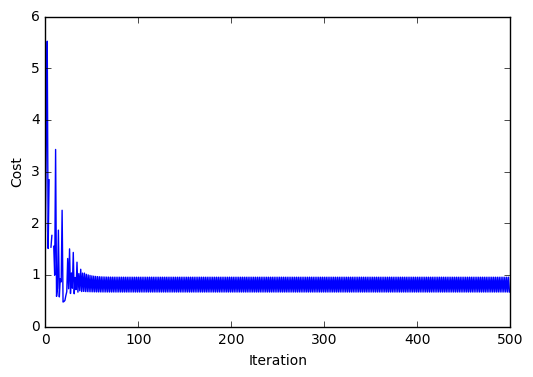

In [343]:
plotCostFunc(0.2)

## Part B - Question 2

Run the code below to see a plot of what the model looks like where it seems to be converging, including the plot of cost function and the value of alpha.
(Make sure to run the code above first to initialize the function and get an output)

The algorithm converged in 630 iterations
The optimal theta values are: [-4.07751502  1.50457826]
The value of alpha is: 0.05


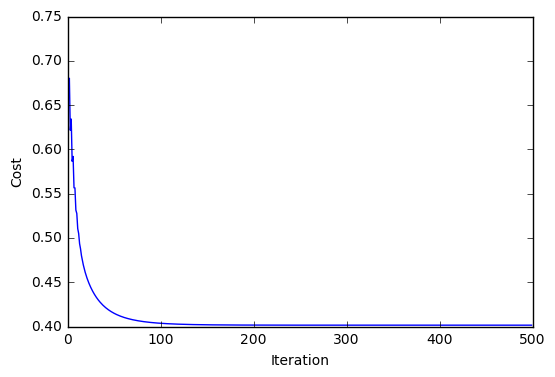

In [344]:
plotCostFunc(0.05)

Part C - Sklearn Library [15 points]

Use the sklearn library function to validate your results. The function
linear_model.SGDClassifier implements gradient descent and the function
argument loss = ‘log’ applies logistic regression.

1. How many iterations are required for the algorithm to converge?
2. Print out the model parameters learned by your model.
3. What is your model’s prediction for 5 hours of studying? 

In [543]:
from sklearn.linear_model import SGDClassifier

# load the data
X = [[0.50],[0.75],[1.00],[1.25],[1.50],[1.75],[1.75],[2.00],[2.25],[2.50],[2.75], [3.00],[3.25],[3.50],[4.00],[4.25],[4.50],[4.75],[5.00],[5.50]]
Y = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

# create a model using stochastic gradient descent as "log" as function argument to implement logistic regression, then fit the data
model = SGDClassifier(loss="log", n_iter = 10000, alpha = 0.05, shuffle = False, penalty = None).fit(X, Y)

## Part C - Question 1

Run the code below to see the number of iterations that were required for the algorithm to converge  
(Make sure to run the code above first to initialize the function and get an output)  

## Part C - Question 2

Run the code below to see the model parameters that were learned by my model  
(Make sure to run the code above first to initialize the function and get an output)  

In [544]:
print model.get_params()

{'warm_start': False, 'loss': 'log', 'n_jobs': 1, 'eta0': 0.0, 'verbose': 0, 'shuffle': False, 'fit_intercept': True, 'epsilon': 0.1, 'average': False, 'n_iter': 10000, 'penalty': None, 'power_t': 0.5, 'random_state': None, 'l1_ratio': 0.15, 'alpha': 0.05, 'learning_rate': 'optimal', 'class_weight': None}


## Part C - Question 3

Run the code below to see my model's prediction for 5 hours of studying  
(Make sure to run the code above first to initialize the function and get an output)  

In [581]:
print "The prediction for 5 hour studying is: " + str(model.predict(5.00))
print model.predict_proba(5.00)

The prediction for 5 hour studying is: [1]
[[ 0.03275967  0.96724033]]
